## Problem Statement

### Imagine you working as a sale manager now you need to predict the Revenue and whether that particular revenue is on the weekend or not and find the Informational_Duration using the Ensemble learning algorithm Dataset This is the Dataset You can use this dataset for this question.

In [1]:
#import neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import shapiro
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#load data
df = pd.read_csv('../ML/dataset/online_shoppers_intention.csv')

In [3]:
#checking no of rows and columns
df.shape

(12330, 18)

- Dataset have 18 features and 12330 entries.

In [4]:
df.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

- Data types are correct
- N0 missing values

In [6]:
#changing datatypes of `Weekend`, and `Revenue`

In [7]:
df['Weekend'] = df['Weekend'].astype('str')
df['Revenue'] = df['Revenue'].astype('str')

In [8]:
#checking missing values
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [10]:
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301


<AxesSubplot:>

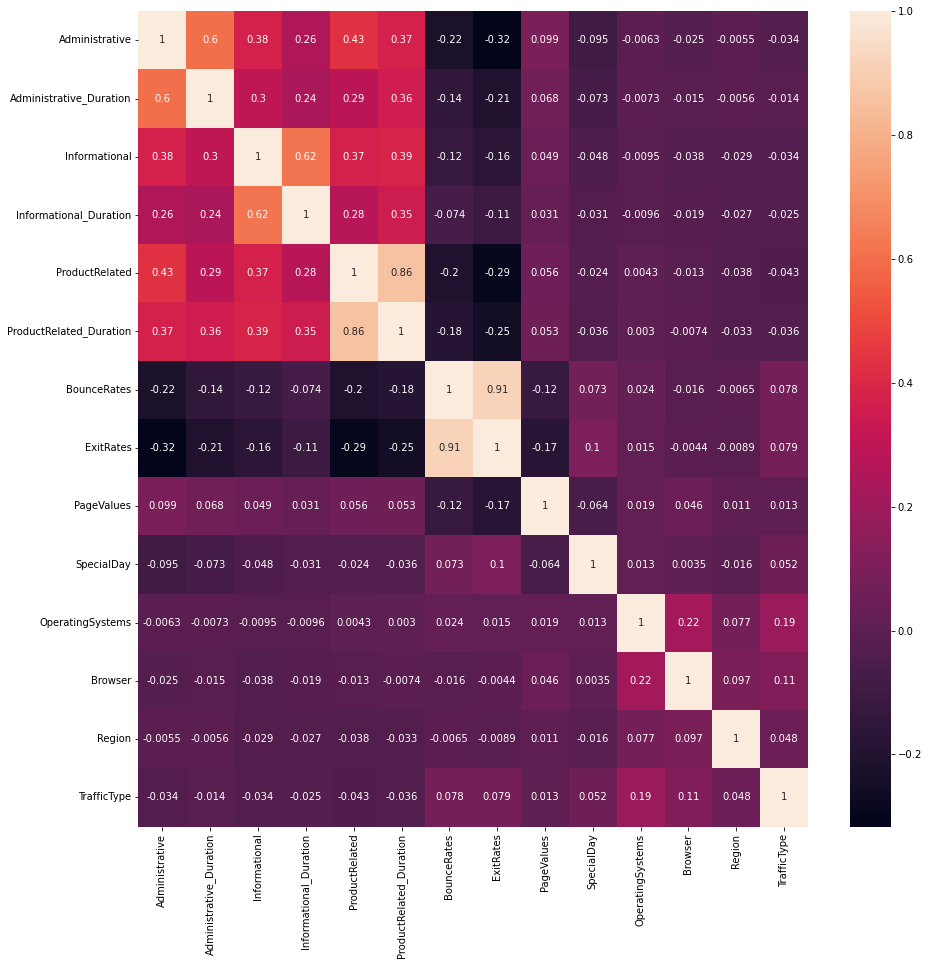

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

- Faeture like `Administrative`, `Administrative_Duration`, `Informational`,`Informational_Duration`, `ProductRelated`, `ProductRelated_Duration` having moderate to strong correlation

In [12]:
#extracting numerical and categorical columns
num_col = [col for col in df.columns if df[col].dtypes != 'O']
cat_col = [col for col in df.columns if df[col].dtypes == 'O']

In [13]:
df_num = df[num_col]
df_cat = df[cat_col]

In [14]:
df_num

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11


In [15]:
df_cat

,Month,VisitorType,Weekend,Revenue
0,Feb,Returning_Visitor,False,False
1,Feb,Returning_Visitor,False,False
2,Feb,Returning_Visitor,False,False
3,Feb,Returning_Visitor,False,False
4,Feb,Returning_Visitor,True,False
...,...,...,...,...
12325,Dec,Returning_Visitor,True,False
12326,Nov,Returning_Visitor,True,False
12327,Nov,Returning_Visitor,True,False
12328,Nov,Returning_Visitor,False,False


In [16]:
#checking distribution of numerical features

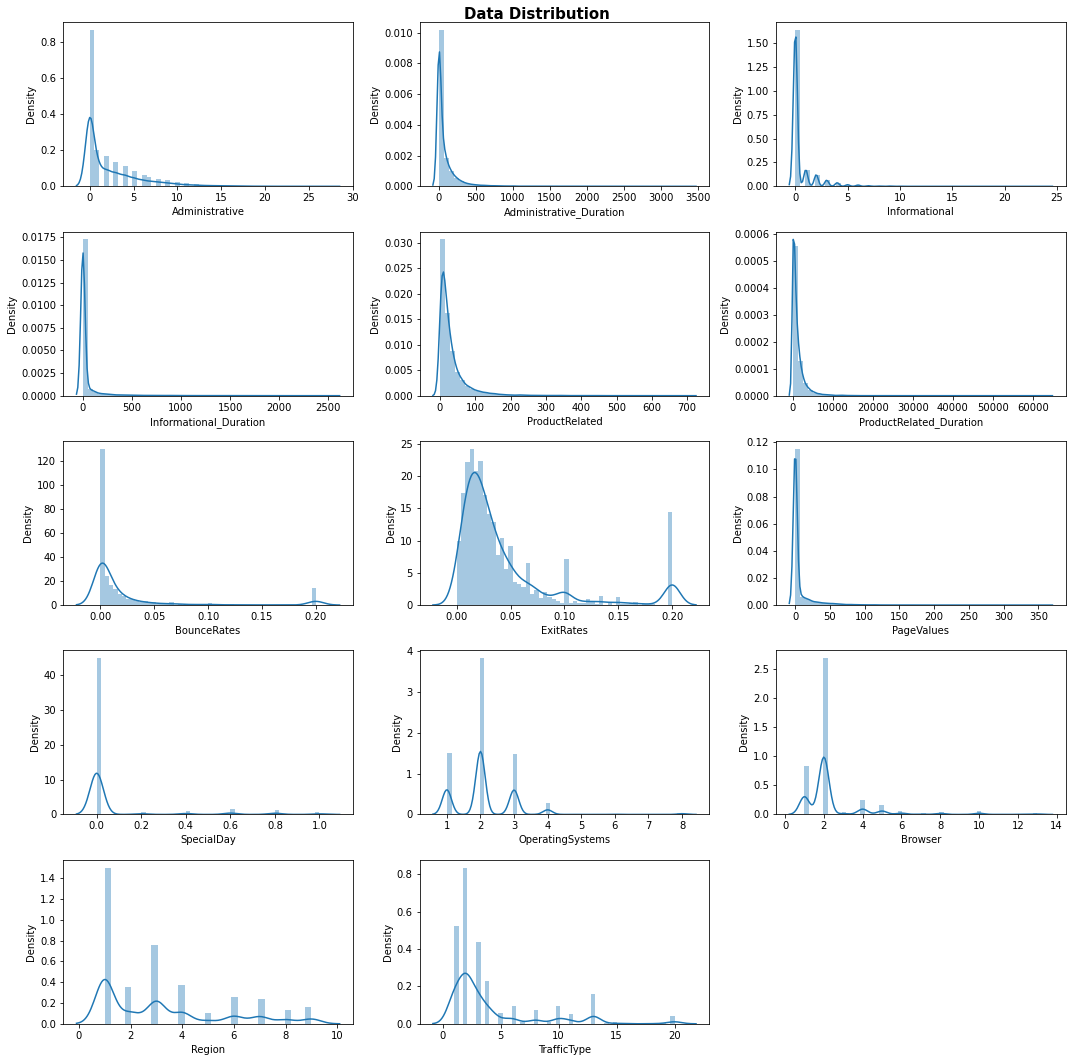

In [17]:
plt.figure(figsize=(15, 15))
plt.suptitle('Data Distribution', fontsize=15, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.distplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

- Aall numerical features does not follow normal distribution.
- Data distribution is right skewed.

In [18]:
#checking outliers

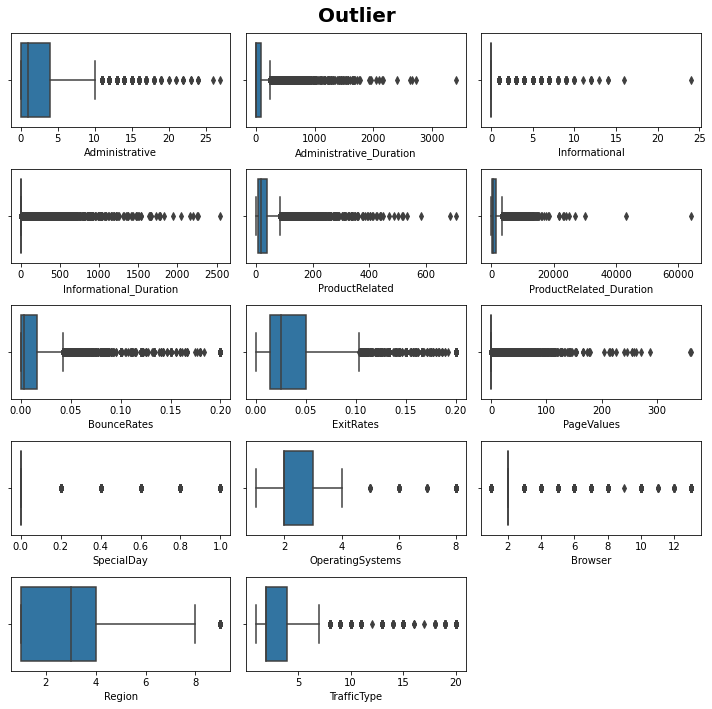

In [19]:
plt.figure(figsize=(10,10))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

- Numerical features have outliers

In [20]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [21]:
cat_col

['Month', 'VisitorType', 'Weekend', 'Revenue']

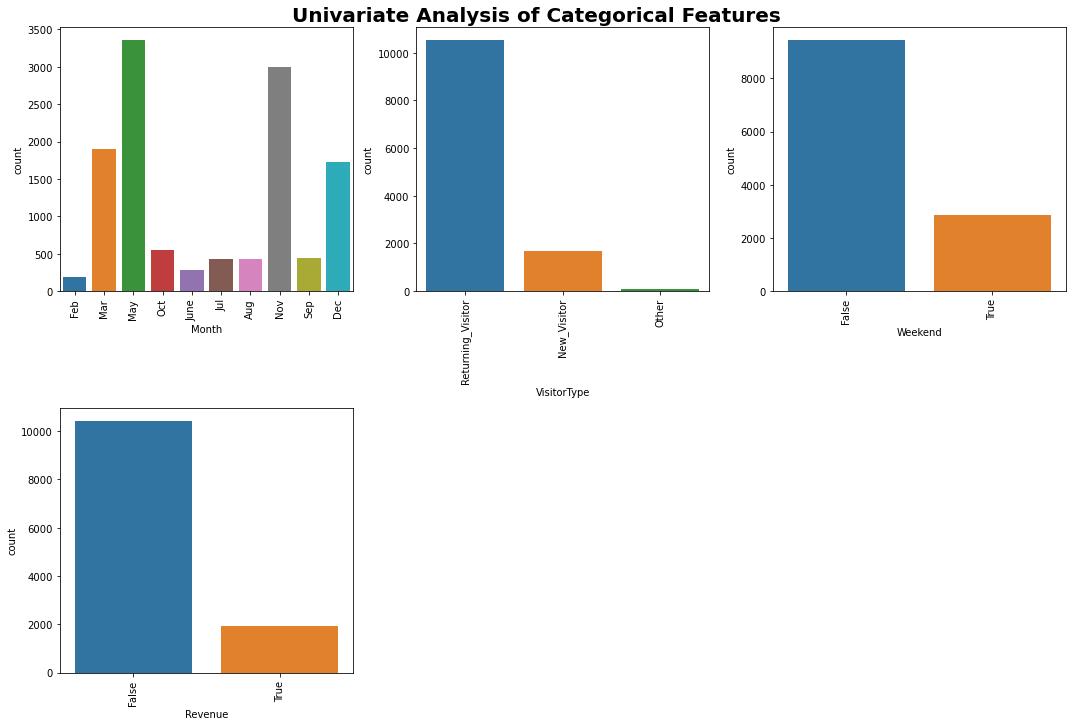

In [22]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(cat_col)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[cat_col[i]],data = df)
    plt.xlabel(cat_col[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

-  cat feature have highly imbalanced data 

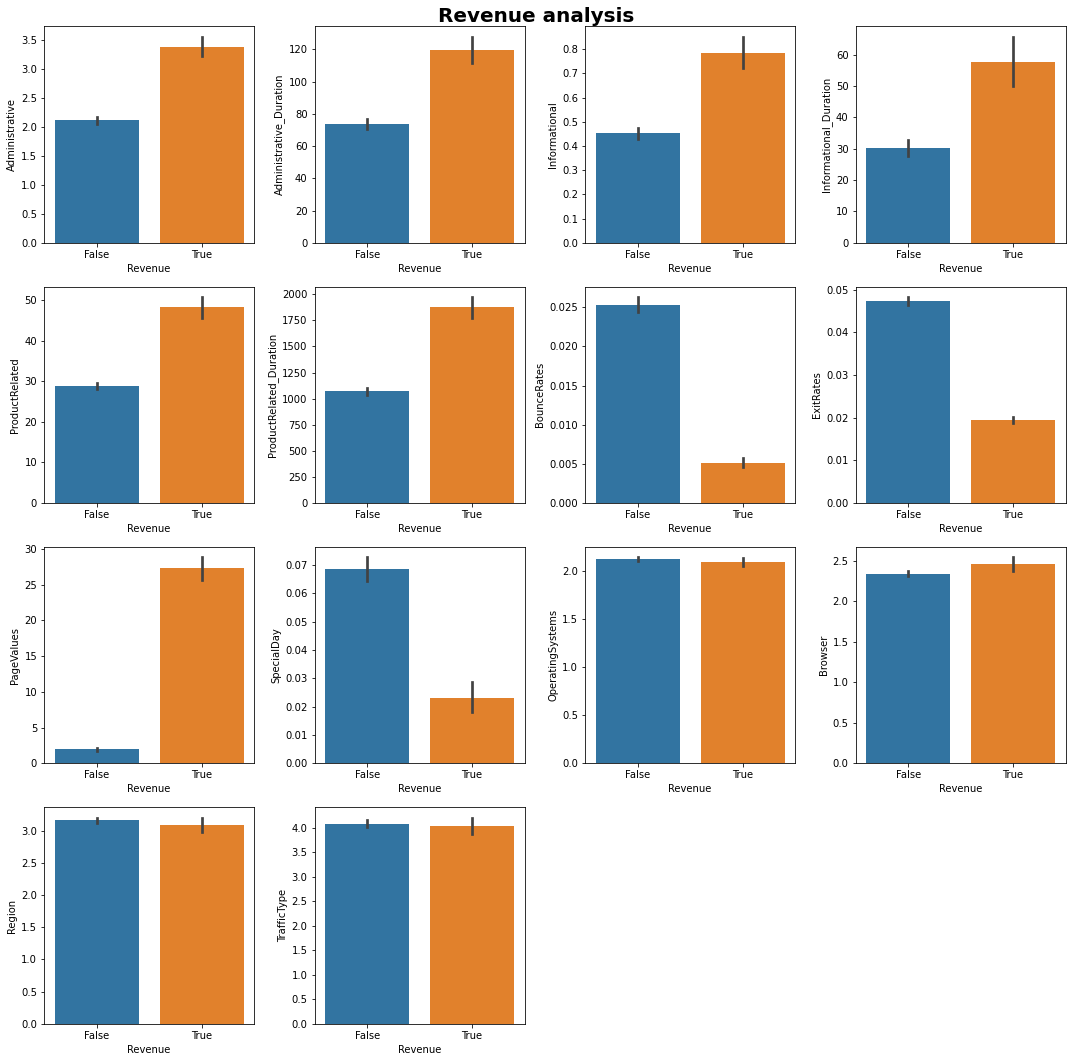

In [23]:
plt.figure(figsize=(15,15))
plt.suptitle('Revenue analysis', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(4, 4, i+1)
    sns.barplot(x='Revenue',y=df[num_col[i]], data = df)
    plt.tight_layout()

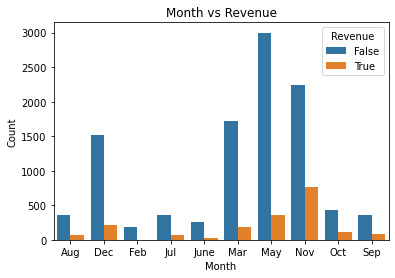

In [24]:
counts = df.groupby(['Month', 'Revenue']).size().reset_index(name='Count')
sns.barplot(x='Month', y='Count', hue='Revenue', data=counts)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month vs Revenue')

# Display the plot
plt.show()


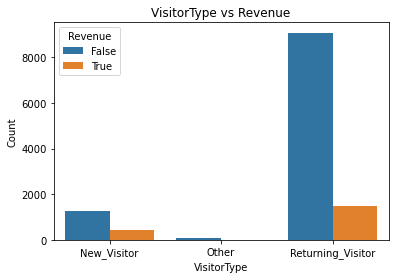

In [25]:
counts = df.groupby(['VisitorType', 'Revenue']).size().reset_index(name='Count')
sns.barplot(x='VisitorType', y='Count', hue='Revenue', data=counts)

# Add labels and title
plt.xlabel('VisitorType')
plt.ylabel('Count')
plt.title('VisitorType vs Revenue')

# Display the plot
plt.show()

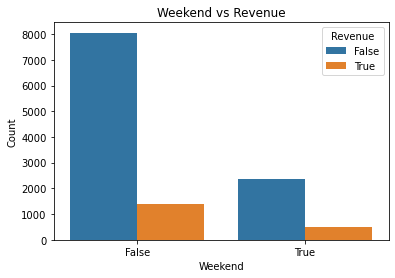

In [26]:
counts = df.groupby(['Weekend', 'Revenue']).size().reset_index(name='Count')
sns.barplot(x='Weekend', y='Count', hue='Revenue', data=counts)

# Add labels and title
plt.xlabel('Weekend')
plt.ylabel('Count')
plt.title('Weekend vs Revenue')

# Display the plot
plt.show()

In [27]:
#Outlier handling

In [28]:
def handling_outliers(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_fence = data[column].quantile(0.25) - (1.5 * IQR)
    higher_fence = data[column].quantile(0.75) + (1.5 * IQR)
    print(column, "---", "IQR --->",IQR)
    print("Lower Fence:",lower_fence)
    print("Higher Fence:", higher_fence)
    print("______________________________________________")
    data.loc[data[column] <=lower_fence, column] = lower_fence
    data.loc[data[column] >=higher_fence, column] = higher_fence

In [29]:
for columns in df_num:
    handling_outliers(df,columns)

Administrative --- IQR ---> 4.0
Lower Fence: -6.0
Higher Fence: 10.0
______________________________________________
Administrative_Duration --- IQR ---> 93.25625
Lower Fence: -139.88437499999998
Higher Fence: 233.14062499999997
______________________________________________
Informational --- IQR ---> 0.0
Lower Fence: 0.0
Higher Fence: 0.0
______________________________________________
Informational_Duration --- IQR ---> 0.0
Lower Fence: 0.0
Higher Fence: 0.0
______________________________________________
ProductRelated --- IQR ---> 31.0
Lower Fence: -39.5
Higher Fence: 84.5
______________________________________________
ProductRelated_Duration --- IQR ---> 1280.0197135
Lower Fence: -1735.8920702500002
Higher Fence: 3384.1867837500004
______________________________________________
BounceRates --- IQR ---> 0.016812558499999998
Lower Fence: -0.025218837749999997
Higher Fence: 0.04203139624999999
______________________________________________
ExitRates --- IQR ---> 0.035714286000000005
Low

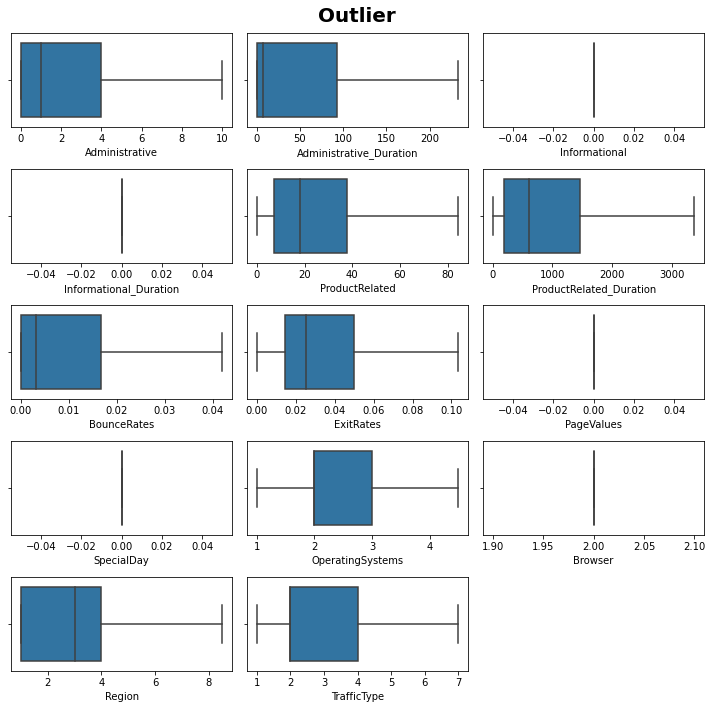

In [30]:
plt.figure(figsize=(10,10))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [31]:
#encoding target feature
le_enc = LabelEncoder()
df['Revenue'] = le_enc.fit_transform(df['Revenue'])

In [32]:
# Split the data into training and testing sets
X = df.drop(['Revenue'], axis=1)
y = df['Revenue']

In [33]:
num_col

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

In [34]:
cat_col

['Month', 'VisitorType', 'Weekend', 'Revenue']

In [35]:
# Creating new variables for numerical attributes/columns
numeric_features = num_col
# Making pipeline for scaling down numerical features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Creating new variables for categorical attributes/columns
categorical_features = ['Month', 'VisitorType', 'Weekend']
# MAking pipeling for Encoding categorical features
categorical_transformer = OneHotEncoder(drop='first',handle_unknown='ignore')

# Creating new variable for these numerical & categorical features pipeline
preprocessor = ColumnTransformer(transformers=[
                                                ('num', numeric_transformer, numeric_features),
                                                ('cat', categorical_transformer, categorical_features),
                                            ])

In [36]:
# Splitting the dataset for training and testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
#Gradient Boosting

In [38]:
#Model Training
gb = Pipeline(steps=[('prepocessor', preprocessor), ('Gradient Boosting Classifier', GradientBoostingClassifier())])
gb.fit(X_train,y_train)

y_pred = gb.predict(X_test)

#Model evaluation
test_acc_gb = accuracy_score(y_test, y_pred)
print("Accuracy:", test_acc_gb)

Accuracy: 0.8365774533657745


In [39]:
# Ada Boost

In [40]:
#Model Training
adb = Pipeline(steps=[('prepocessor', preprocessor), ('Ada Boost Classifier', AdaBoostClassifier())])
adb.fit(X_train,y_train)

y_pred = adb.predict(X_test)

#Model evaluation
test_acc_adb = accuracy_score(y_test, y_pred)
print("Accuracy:", test_acc_adb)

Accuracy: 0.8309002433090025


In [41]:
#XGBoost

In [42]:
#Model Training
xgb = Pipeline(steps=[('prepocessor', preprocessor), ('XGBoost Classifier', XGBClassifier())])
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

#Model evaluation
test_acc_xgb = accuracy_score(y_test, y_pred)
print("Accuracy:", test_acc_xgb)

Accuracy: 0.8284671532846716


In [43]:
# Random Forest

In [44]:
#Model Training
rf = Pipeline(steps=[('prepocessor', preprocessor), 
                     ('Random Forest Classifier', RandomForestClassifier())])
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

#Model evaluation
test_acc_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", test_acc_rf)

Accuracy: 0.8337388483373885


In [45]:
models = pd.DataFrame({
    'Model' : ['Random Forest','Gradient Boosting','AdaBoost','XGBoost'],
    'Accuracy' : [test_acc_rf,test_acc_gb,test_acc_adb,test_acc_xgb],
})

best_model =models.sort_values(by='Accuracy', ascending=False)
best_model

,Model,Accuracy
1,Gradient Boosting,0.836577
0,Random Forest,0.833739
2,AdaBoost,0.830900
3,XGBoost,0.828467


- RF classifier performs better.

In [46]:
class_report_rf = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report_rf)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.91      2055
           1       0.51      0.09      0.15       411

    accuracy                           0.83      2466
   macro avg       0.68      0.53      0.53      2466
weighted avg       0.79      0.83      0.78      2466



In [47]:
y_pred[0:5]

array([0, 0, 1, 0, 0])

In [48]:
for i in le_enc.inverse_transform(y_pred[0:5]):
    print(i)

False
False
True
False
False
